In [ ]:
import pandas as pd
import numpy as np
import psycopg2
import sqlalchemy
import csv
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import warnings
warnings.filterwarnings('ignore', '.*do not.*', )
warnings.warn('DelftStack')
warnings.warn('Do not show this message')

In [ ]:
df= pd.read_csv('DeviceHistoryData_New_9_20june.csv', index_col= 0)
df = df.sort_values(by='Time')
df

,TableVersion,Time,DeviceGuid,UpdateTime,Alive,LastTimeSeen,ConnectionStage,Enabled,DeviceState,DeviceStateDescription,...,RealSpeedVy,RealSpeedVaInRad,RealLinearSpeed,Run,RunCurrentPriorityLevel,RunBlockMotion,Scanner1Value,Scanner2value,Trolley1,Trolley2
314399,1,2022-06-09 07:00:00.712 +00:00,3FA85F64-5717-4562-B3FC-2C963F66AFA6,2022-06-09 09:00:00.700 +02:00,True,2022-06-09 08:59:54.455 +02:00,3,True,4,Online,...,0.0,0.0,443.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
314400,1,2022-06-09 07:00:01.727 +00:00,3FA85F64-5717-4562-B3FC-2C963F66AFA6,2022-06-09 09:00:01.636 +02:00,True,2022-06-09 08:59:54.455 +02:00,3,True,4,Online,...,0.0,0.0,450.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
314401,1,2022-06-09 07:00:02.743 +00:00,3FA85F64-5717-4562-B3FC-2C963F66AFA6,2022-06-09 09:00:02.572 +02:00,True,2022-06-09 08:59:54.455 +02:00,3,True,4,Online,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
314402,1,2022-06-09 07:00:03.756 +00:00,3FA85F64-5717-4562-B3FC-2C963F66AFA6,2022-06-09 09:00:03.510 +02:00,True,2022-06-09 08:59:54.455 +02:00,3,True,4,Online,...,0.0,0.0,126.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
314403,1,2022-06-09 07:00:04.769 +00:00,3FA85F64-5717-4562-B3FC-2C963F66AFA6,2022-06-09 09:00:04.757 +02:00,True,2022-06-09 09:00:04.488 +02:00,3,True,4,Online,...,0.0,0.0,272.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1834559,1,2022-06-20 20:31:21.196 +00:00,3FA85F64-5717-4562-B3FC-2C963F66AFA6,2022-06-20 22:31:19.179 +02:00,False,2022-06-20 16:26:13.258 +02:00,0,True,2,TimeOut,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1834560,1,2022-06-20 20:31:22.211 +00:00,C032556A-4E53-4FC2-51E1-08DA4542B6E7,2022-06-03 13:25:14.590 +02:00,False,NaN,0,True,2,TimeOut,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1834561,1,2022-06-20 20:31:22.211 +00:00,3FA85F64-5717-4562-B3FC-2C963F66AFA6,2022-06-20 22:31:19.179 +02:00,False,2022-06-20 16:26:13.258 +02:00,0,True,2,TimeOut,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1834563,1,2022-06-20 20:31:23.227 +00:00,3FA85F64-5717-4562-B3FC-2C963F66AFA6,2022-06-20 22:31:19.179 +02:00,False,2022-06-20 16:26:13.258 +02:00,0,True,2,TimeOut,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
from datetime import datetime

df_need = df.loc[:,['Time','Alive'	,'LastTimeSeen'	,'ConnectionStage'	,'Enabled'
                     ,'DeviceState'	,'DeviceStateDescription'	,'Errors'	,'Circuit'	,'DestinationNode'	,'LocationX'	,'LocationY']]



df_need['Time'] = pd.to_datetime(df_need['Time'],format='%Y%m%d %H:%M:%S')
#df_need['Time'].replace(microsecond = 0)
#df_need['UpdateTime'] = pd.to_datetime(df_need['UpdateTime'],format='%Y%m%d %H:%M:%S')
#df_need['UpdateTime'].replace(microsecond = 0)
#extract date
df_need['date'] = df_need['Time'].dt.strftime('%D')
df_need['date'] = pd.to_datetime(df_need.date)
#extract the time 
#df_need['time'] = df_need['Time'].dt.time

df_need.insert(0, 'date', df_need.pop('date'))
#df_need.insert(1, 'time', df_need.pop('time'))
#df_need.drop("Time", axis = 1)
##del df_need['Time']
df_need = df_need.sort_values(by='Time')
df_need.head() 

,date,Time,Alive,LastTimeSeen,ConnectionStage,Enabled,DeviceState,DeviceStateDescription,Errors,Circuit,DestinationNode,LocationX,LocationY
314399,2022-06-09,2022-06-09 07:00:00.712000+00:00,True,2022-06-09 08:59:54.455 +02:00,3,True,4,Online,[],11.0,2076.0,23.270,4.719
314400,2022-06-09,2022-06-09 07:00:01.727000+00:00,True,2022-06-09 08:59:54.455 +02:00,3,True,4,Online,[],11.0,2076.0,23.788,4.710
314401,2022-06-09,2022-06-09 07:00:02.743000+00:00,True,2022-06-09 08:59:54.455 +02:00,3,True,4,Online,[],11.0,2078.0,24.097,4.708
314402,2022-06-09,2022-06-09 07:00:03.756000+00:00,True,2022-06-09 08:59:54.455 +02:00,3,True,4,Online,[],11.0,2078.0,24.076,4.711
314403,2022-06-09,2022-06-09 07:00:04.769000+00:00,True,2022-06-09 09:00:04.488 +02:00,3,True,4,Online,[],11.0,2078.0,23.903,4.712


In [ ]:
df_need = df_need.dropna()
df_need.head()

,date,Time,Alive,LastTimeSeen,ConnectionStage,Enabled,DeviceState,DeviceStateDescription,Errors,Circuit,DestinationNode,LocationX,LocationY
314399,2022-06-09,2022-06-09 07:00:00.712000+00:00,True,2022-06-09 08:59:54.455 +02:00,3,True,4,Online,[],11.0,2076.0,23.270,4.719
314400,2022-06-09,2022-06-09 07:00:01.727000+00:00,True,2022-06-09 08:59:54.455 +02:00,3,True,4,Online,[],11.0,2076.0,23.788,4.710
314401,2022-06-09,2022-06-09 07:00:02.743000+00:00,True,2022-06-09 08:59:54.455 +02:00,3,True,4,Online,[],11.0,2078.0,24.097,4.708
314402,2022-06-09,2022-06-09 07:00:03.756000+00:00,True,2022-06-09 08:59:54.455 +02:00,3,True,4,Online,[],11.0,2078.0,24.076,4.711
314403,2022-06-09,2022-06-09 07:00:04.769000+00:00,True,2022-06-09 09:00:04.488 +02:00,3,True,4,Online,[],11.0,2078.0,23.903,4.712


9June

In [ ]:
#dd = pd.read_csv('df_need3.csv', index_col= 0)
dd = df_need.copy()
df_9June = dd.loc[(dd['date'] == '2022-06-09')]
df_9June = df_9June.sort_values(by='Time')


import math
def calculateDistance(x1,y1,x2,y2):
  
  dy = y2 - y1
  dx = x2 - x1
  dist = math.sqrt((dx)**2 + (dy)**2)
  
  return dist

df_9June['distance'] = pd.concat([df_9June.add_suffix('_pre').shift(), df_9June], axis=1).apply(lambda x: calculateDistance(x['LocationX_pre'], x['LocationY_pre'], x['LocationX'], x['LocationY']), axis=1)

df_9June = df_9June.loc[:,[	'date','Time','Enabled'	,'Circuit'	,'DestinationNode'	,'LocationX'	,'LocationY','distance']]



dpp = df_9June.copy()
dpp['Time'] = pd.to_datetime(dpp['Time'],format='%Y%m%d %H:%M:%S')
dpp['Time'] = pd.to_datetime(dpp.Time).dt.tz_localize(None)
dpp['Time'] = dpp['Time'].astype('datetime64[s]')
#remove timezone
dpp['Time'] = pd.to_datetime(dpp.Time).dt.tz_localize(None)

dpp['T_Time']  = pd.to_datetime(dpp['Time']).dt.time
#dpp['T_Time'] = pd.to_datetime(dpp['T_Time'],format='%H:%M:%S')
#dpp['T_Time'] = dpp['T_Time'].astype('datetime64[s]')
dpp['T_Time']  = pd.to_datetime(dpp['Time']).dt.time
dpp['hour'] = dpp['Time'].dt.hour
#arranging
zero_column1 = dpp.pop('hour')
dpp.insert(1, 'hour' ,zero_column1)

zero_column2 = dpp.pop('T_Time')
dpp.insert(2, 'T_Time' ,zero_column2)
dpp

,date,hour,T_Time,Time,Enabled,Circuit,DestinationNode,LocationX,LocationY,distance
314399,2022-06-09,7,07:00:00,2022-06-09 07:00:00,True,11.0,2076.0,23.270,4.719,NaN
314400,2022-06-09,7,07:00:01,2022-06-09 07:00:01,True,11.0,2076.0,23.788,4.710,0.518078
314401,2022-06-09,7,07:00:02,2022-06-09 07:00:02,True,11.0,2078.0,24.097,4.708,0.309006
314402,2022-06-09,7,07:00:03,2022-06-09 07:00:03,True,11.0,2078.0,24.076,4.711,0.021213
314403,2022-06-09,7,07:00:04,2022-06-09 07:00:04,True,11.0,2078.0,23.903,4.712,0.173003
...,...,...,...,...,...,...,...,...,...,...
371129,2022-06-09,15,15:59:54,2022-06-09 15:59:54,True,14.0,2077.0,13.285,37.908,1.042045
371130,2022-06-09,15,15:59:55,2022-06-09 15:59:55,True,14.0,2077.0,13.750,37.755,0.489524
371132,2022-06-09,15,15:59:56,2022-06-09 15:59:56,True,14.0,2077.0,14.487,37.520,0.773559
371134,2022-06-09,15,15:59:58,2022-06-09 15:59:58,True,14.0,2077.0,15.252,37.367,0.780150


In [ ]:
dpp['Circuit'].unique()

array([11., 12., 13., 14., 15., 10.])

In [ ]:
dpp_stop = dpp.loc[(dpp['distance'] == 0)]

df_9June = dpp_stop.loc[:,['date','hour','Time','Circuit'	,'LocationX'	,'LocationY','distance']]
df_9June = df_9June.sort_values(by='Time')

dpp = df_9June.copy()
dpp['Time'] = pd.to_datetime(dpp['Time'],format='%Y%m%d %H:%M:%S')
#remove timezone
dpp['Time'] = pd.to_datetime(dpp.Time).dt.tz_localize(None)

dpp['T_Time']  = pd.to_datetime(dpp['Time']).dt.time
#arranging
zero_column = dpp.pop('T_Time')
dpp.insert(1, 'T_Time' ,zero_column)
dpp

,date,T_Time,hour,Time,Circuit,LocationX,LocationY,distance
314429,2022-06-09,07:00:31,7,2022-06-09 07:00:31,11.0,4.010,5.201,0.0
314430,2022-06-09,07:00:32,7,2022-06-09 07:00:32,11.0,4.010,5.201,0.0
314431,2022-06-09,07:00:33,7,2022-06-09 07:00:33,11.0,4.010,5.201,0.0
314432,2022-06-09,07:00:34,7,2022-06-09 07:00:34,11.0,4.010,5.201,0.0
314433,2022-06-09,07:00:35,7,2022-06-09 07:00:35,11.0,4.010,5.201,0.0
...,...,...,...,...,...,...,...,...
371023,2022-06-09,15:58:32,15,2022-06-09 15:58:32,14.0,4.844,22.323,0.0
371024,2022-06-09,15:58:33,15,2022-06-09 15:58:33,14.0,4.844,22.323,0.0
371025,2022-06-09,15:58:34,15,2022-06-09 15:58:34,14.0,4.844,22.323,0.0
371034,2022-06-09,15:58:44,15,2022-06-09 15:58:44,14.0,4.955,22.355,0.0


In [ ]:
dpp['Circuit'].unique()

array([11., 12., 13., 14., 15., 10.])

In [ ]:
df1 = dpp[dpp['Circuit'].isin([10, 11, 12, 13, 14, 15])]
df1

,date,T_Time,hour,Time,Circuit,LocationX,LocationY,distance
314429,2022-06-09,07:00:31,7,2022-06-09 07:00:31,11.0,4.010,5.201,0.0
314430,2022-06-09,07:00:32,7,2022-06-09 07:00:32,11.0,4.010,5.201,0.0
314431,2022-06-09,07:00:33,7,2022-06-09 07:00:33,11.0,4.010,5.201,0.0
314432,2022-06-09,07:00:34,7,2022-06-09 07:00:34,11.0,4.010,5.201,0.0
314433,2022-06-09,07:00:35,7,2022-06-09 07:00:35,11.0,4.010,5.201,0.0
...,...,...,...,...,...,...,...,...
371023,2022-06-09,15:58:32,15,2022-06-09 15:58:32,14.0,4.844,22.323,0.0
371024,2022-06-09,15:58:33,15,2022-06-09 15:58:33,14.0,4.844,22.323,0.0
371025,2022-06-09,15:58:34,15,2022-06-09 15:58:34,14.0,4.844,22.323,0.0
371034,2022-06-09,15:58:44,15,2022-06-09 15:58:44,14.0,4.955,22.355,0.0


In [ ]:
df1 = dpp.loc[(dpp['Circuit'].ne(dpp['Circuit'].shift())) | 
             (dpp['Circuit'].ne(dpp['Circuit'].shift(-1)))]

df1             

,date,T_Time,hour,Time,Circuit,LocationX,LocationY,distance
314429,2022-06-09,07:00:31,7,2022-06-09 07:00:31,11.0,4.010,5.201,0.0
314950,2022-06-09,07:07:34,7,2022-06-09 07:07:34,11.0,11.916,35.301,0.0
314971,2022-06-09,07:07:54,7,2022-06-09 07:07:54,12.0,23.233,37.397,0.0
315671,2022-06-09,07:16:05,7,2022-06-09 07:16:05,12.0,20.944,7.751,0.0
315673,2022-06-09,07:16:06,7,2022-06-09 07:16:06,13.0,20.944,7.751,0.0
...,...,...,...,...,...,...,...,...
370162,2022-06-09,15:48:01,15,2022-06-09 15:48:01,12.0,20.933,7.711,0.0
370163,2022-06-09,15:48:02,15,2022-06-09 15:48:02,13.0,20.933,7.711,0.0
370801,2022-06-09,15:56:00,15,2022-06-09 15:56:00,13.0,11.917,35.296,0.0
370836,2022-06-09,15:56:23,15,2022-06-09 15:56:23,14.0,23.590,37.396,0.0


In [ ]:
df1['Circuit'].unique()

array([11., 12., 13., 14., 15., 10.])

In [ ]:
dd = df1.copy()
ddt = pd.concat([dd.add_suffix('_pre').shift(), dd], axis=1)
#dd['Time_diff'] = dd["Time"].diff()
ddt['Time_diff'] = ddt["Time"].diff().apply(lambda x: x/np.timedelta64(1, 's')).fillna(0).astype('int64')
ddt
df_9June = ddt.loc[:,['date','hour','Time_pre','Time','Circuit' ,'Time_diff']] 
df_9June = df_9June.dropna()
df_9June

,date,hour,Time_pre,Time,Circuit,Time_diff
314950,2022-06-09,7,2022-06-09 07:00:31,2022-06-09 07:07:34,11.0,423
314971,2022-06-09,7,2022-06-09 07:07:34,2022-06-09 07:07:54,12.0,20
315671,2022-06-09,7,2022-06-09 07:07:54,2022-06-09 07:16:05,12.0,491
315673,2022-06-09,7,2022-06-09 07:16:05,2022-06-09 07:16:06,13.0,1
316295,2022-06-09,7,2022-06-09 07:16:06,2022-06-09 07:24:12,13.0,486
...,...,...,...,...,...,...
370162,2022-06-09,15,2022-06-09 15:43:22,2022-06-09 15:48:01,12.0,279
370163,2022-06-09,15,2022-06-09 15:48:01,2022-06-09 15:48:02,13.0,1
370801,2022-06-09,15,2022-06-09 15:48:02,2022-06-09 15:56:00,13.0,478
370836,2022-06-09,15,2022-06-09 15:56:00,2022-06-09 15:56:23,14.0,23


10June

In [ ]:
#dd = pd.read_csv('df_need3.csv', index_col= 0)
dd = df_need.copy()
df_10June = dd.loc[(dd['date'] == '2022-06-10')]
df_10June = df_10June.sort_values(by='Time')


import math
def calculateDistance(x1,y1,x2,y2):
  
  dy = y2 - y1
  dx = x2 - x1
  dist = math.sqrt((dx)**2 + (dy)**2)
  
  return dist

df_10June['distance'] = pd.concat([df_10June.add_suffix('_pre').shift(), df_10June], axis=1).apply(lambda x: calculateDistance(x['LocationX_pre'], x['LocationY_pre'], x['LocationX'], x['LocationY']), axis=1)

df_10June = df_10June.loc[:,[	'date','Time','Enabled'	,'Circuit'	,'DestinationNode'	,'LocationX'	,'LocationY','distance']]



dpp = df_10June.copy()
dpp['Time'] = pd.to_datetime(dpp['Time'],format='%Y%m%d %H:%M:%S')
dpp['Time'] = pd.to_datetime(dpp.Time).dt.tz_localize(None)
dpp['Time'] = dpp['Time'].astype('datetime64[s]')
#remove timezone
dpp['Time'] = pd.to_datetime(dpp.Time).dt.tz_localize(None)

dpp['T_Time']  = pd.to_datetime(dpp['Time']).dt.time
#dpp['T_Time'] = pd.to_datetime(dpp['T_Time'],format='%H:%M:%S')
#dpp['T_Time'] = dpp['T_Time'].astype('datetime64[s]')
dpp['T_Time']  = pd.to_datetime(dpp['Time']).dt.time
dpp['hour'] = dpp['Time'].dt.hour
#arranging
zero_column1 = dpp.pop('hour')
dpp.insert(1, 'hour' ,zero_column1)

zero_column2 = dpp.pop('T_Time')
dpp.insert(2, 'T_Time' ,zero_column2)
dpp

,date,hour,T_Time,Time,Enabled,Circuit,DestinationNode,LocationX,LocationY,distance
78212,2022-06-10,5,05:59:03,2022-06-10 05:59:03,True,12.0,2055.0,32.341,25.780,NaN
84677,2022-06-10,5,05:59:07,2022-06-10 05:59:07,True,12.0,2055.0,32.335,24.912,0.868021
84679,2022-06-10,5,05:59:08,2022-06-10 05:59:08,True,12.0,2055.0,32.328,24.039,0.873028
78214,2022-06-10,5,05:59:09,2022-06-10 05:59:09,True,12.0,2055.0,32.323,23.152,0.887014
78216,2022-06-10,5,05:59:10,2022-06-10 05:59:10,True,12.0,2055.0,32.315,21.965,1.187027
...,...,...,...,...,...,...,...,...,...,...
310097,2022-06-10,23,23:59:55,2022-06-10 23:59:55,True,14.0,2065.0,22.447,37.393,0.000000
310099,2022-06-10,23,23:59:56,2022-06-10 23:59:56,True,14.0,2065.0,22.447,37.393,0.000000
316372,2022-06-10,23,23:59:57,2022-06-10 23:59:57,True,14.0,2065.0,22.447,37.393,0.000000
369251,2022-06-10,23,23:59:58,2022-06-10 23:59:58,True,14.0,2065.0,22.447,37.393,0.000000


In [ ]:
dpp['Circuit'].unique()

array([12., 13., 14., 15., 10., 11.])

In [ ]:
dpp_stop = dpp.loc[(dpp['distance'] == 0)]

df_10June = dpp_stop.loc[:,['date','hour','Time','Circuit'	,'LocationX'	,'LocationY','distance']]
df_10June = df_10June.sort_values(by='Time')

dpp = df_10June.copy()
dpp['Time'] = pd.to_datetime(dpp['Time'],format='%Y%m%d %H:%M:%S')
#remove timezone
dpp['Time'] = pd.to_datetime(dpp.Time).dt.tz_localize(None)

dpp['T_Time']  = pd.to_datetime(dpp['Time']).dt.time
#arranging
zero_column = dpp.pop('T_Time')
dpp.insert(1, 'T_Time' ,zero_column)
dpp

,date,T_Time,hour,Time,Circuit,LocationX,LocationY,distance
1500,2022-06-10,05:59:45,5,2022-06-10 05:59:45,12.0,20.792,4.689,0.0
1501,2022-06-10,05:59:46,5,2022-06-10 05:59:46,12.0,20.792,4.689,0.0
1502,2022-06-10,05:59:47,5,2022-06-10 05:59:47,12.0,20.792,4.689,0.0
1503,2022-06-10,05:59:48,5,2022-06-10 05:59:48,12.0,20.792,4.689,0.0
1504,2022-06-10,05:59:49,5,2022-06-10 05:59:49,12.0,20.792,4.689,0.0
...,...,...,...,...,...,...,...,...
310097,2022-06-10,23:59:55,23,2022-06-10 23:59:55,14.0,22.447,37.393,0.0
310099,2022-06-10,23:59:56,23,2022-06-10 23:59:56,14.0,22.447,37.393,0.0
316372,2022-06-10,23:59:57,23,2022-06-10 23:59:57,14.0,22.447,37.393,0.0
369251,2022-06-10,23:59:58,23,2022-06-10 23:59:58,14.0,22.447,37.393,0.0


In [ ]:
dpp['Circuit'].unique()
df1 = dpp[dpp['Circuit'].isin([10, 11, 12, 13, 14, 15])]
df1

,date,T_Time,hour,Time,Circuit,LocationX,LocationY,distance
1500,2022-06-10,05:59:45,5,2022-06-10 05:59:45,12.0,20.792,4.689,0.0
1501,2022-06-10,05:59:46,5,2022-06-10 05:59:46,12.0,20.792,4.689,0.0
1502,2022-06-10,05:59:47,5,2022-06-10 05:59:47,12.0,20.792,4.689,0.0
1503,2022-06-10,05:59:48,5,2022-06-10 05:59:48,12.0,20.792,4.689,0.0
1504,2022-06-10,05:59:49,5,2022-06-10 05:59:49,12.0,20.792,4.689,0.0
...,...,...,...,...,...,...,...,...
310097,2022-06-10,23:59:55,23,2022-06-10 23:59:55,14.0,22.447,37.393,0.0
310099,2022-06-10,23:59:56,23,2022-06-10 23:59:56,14.0,22.447,37.393,0.0
316372,2022-06-10,23:59:57,23,2022-06-10 23:59:57,14.0,22.447,37.393,0.0
369251,2022-06-10,23:59:58,23,2022-06-10 23:59:58,14.0,22.447,37.393,0.0


In [ ]:
df1 = dpp.loc[(dpp['Circuit'].ne(dpp['Circuit'].shift())) | 
             (dpp['Circuit'].ne(dpp['Circuit'].shift(-1)))]

df1 

,date,T_Time,hour,Time,Circuit,LocationX,LocationY,distance
1500,2022-06-10,05:59:45,5,2022-06-10 05:59:45,12.0,20.792,4.689,0.0
3301,2022-06-10,06:03:32,6,2022-06-10 06:03:32,12.0,20.930,7.727,0.0
3322,2022-06-10,06:03:38,6,2022-06-10 06:03:38,13.0,20.991,5.112,0.0
24556,2022-06-10,06:11:26,6,2022-06-10 06:11:26,13.0,12.451,35.306,0.0
24568,2022-06-10,06:11:41,6,2022-06-10 06:11:41,14.0,21.597,37.393,0.0
...,...,...,...,...,...,...,...,...
44221,2022-06-10,17:37:58,17,2022-06-10 17:37:58,12.0,20.929,7.711,0.0
44223,2022-06-10,17:37:59,17,2022-06-10 17:37:59,13.0,20.929,7.711,0.0
82679,2022-06-10,17:45:48,17,2022-06-10 17:45:48,13.0,11.913,35.303,0.0
84042,2022-06-10,17:46:08,17,2022-06-10 17:46:08,14.0,22.447,37.393,0.0


In [ ]:
dd = df1.copy()
ddt = pd.concat([dd.add_suffix('_pre').shift(), dd], axis=1)
#dd['Time_diff'] = dd["Time"].diff()
ddt['Time_diff'] = ddt["Time"].diff().apply(lambda x: x/np.timedelta64(1, 's')).fillna(0).astype('int64')
ddt
df_10June = ddt.loc[:,['date','hour','Time_pre','Time','Circuit' ,'Time_diff']] 
df_10June = df_10June.dropna()
df_10June

,date,hour,Time_pre,Time,Circuit,Time_diff
3301,2022-06-10,6,2022-06-10 05:59:45,2022-06-10 06:03:32,12.0,227
3322,2022-06-10,6,2022-06-10 06:03:32,2022-06-10 06:03:38,13.0,6
24556,2022-06-10,6,2022-06-10 06:03:38,2022-06-10 06:11:26,13.0,468
24568,2022-06-10,6,2022-06-10 06:11:26,2022-06-10 06:11:41,14.0,15
40478,2022-06-10,6,2022-06-10 06:11:41,2022-06-10 06:17:14,14.0,333
...,...,...,...,...,...,...
44221,2022-06-10,17,2022-06-10 17:33:17,2022-06-10 17:37:58,12.0,281
44223,2022-06-10,17,2022-06-10 17:37:58,2022-06-10 17:37:59,13.0,1
82679,2022-06-10,17,2022-06-10 17:37:59,2022-06-10 17:45:48,13.0,469
84042,2022-06-10,17,2022-06-10 17:45:48,2022-06-10 17:46:08,14.0,20


13June

In [ ]:
#dd = pd.read_csv('df_need3.csv', index_col= 0)
dd = df_need.copy()
df_13June = dd.loc[(dd['date'] == '2022-06-13')]
df_13June = df_13June.sort_values(by='Time')


import math
def calculateDistance(x1,y1,x2,y2):
  
  dy = y2 - y1
  dx = x2 - x1
  dist = math.sqrt((dx)**2 + (dy)**2)
  
  return dist

df_13June['distance'] = pd.concat([df_13June.add_suffix('_pre').shift(), df_13June], axis=1).apply(lambda x: calculateDistance(x['LocationX_pre'], x['LocationY_pre'], x['LocationX'], x['LocationY']), axis=1)

df_13June = df_13June.loc[:,[	'date','Time','Enabled'	,'Circuit'	,'DestinationNode'	,'LocationX'	,'LocationY','distance']]



dpp = df_13June.copy()
dpp['Time'] = pd.to_datetime(dpp['Time'],format='%Y%m%d %H:%M:%S')
dpp['Time'] = pd.to_datetime(dpp.Time).dt.tz_localize(None)
dpp['Time'] = dpp['Time'].astype('datetime64[s]')
#remove timezone
dpp['Time'] = pd.to_datetime(dpp.Time).dt.tz_localize(None)

dpp['T_Time']  = pd.to_datetime(dpp['Time']).dt.time
#dpp['T_Time'] = pd.to_datetime(dpp['T_Time'],format='%H:%M:%S')
#dpp['T_Time'] = dpp['T_Time'].astype('datetime64[s]')
dpp['T_Time']  = pd.to_datetime(dpp['Time']).dt.time
dpp['hour'] = dpp['Time'].dt.hour
#arranging
zero_column1 = dpp.pop('hour')
dpp.insert(1, 'hour' ,zero_column1)

zero_column2 = dpp.pop('T_Time')
dpp.insert(2, 'T_Time' ,zero_column2)
dpp

,date,hour,T_Time,Time,Enabled,Circuit,DestinationNode,LocationX,LocationY,distance
540164,2022-06-13,6,06:38:44,2022-06-13 06:38:44,True,14.0,2065.0,22.447,37.393,NaN
540175,2022-06-13,6,06:38:45,2022-06-13 06:38:45,True,14.0,2065.0,22.447,37.393,0.0
540186,2022-06-13,6,06:38:46,2022-06-13 06:38:46,True,14.0,2065.0,22.447,37.393,0.0
540197,2022-06-13,6,06:38:47,2022-06-13 06:38:47,True,14.0,2065.0,22.447,37.393,0.0
540208,2022-06-13,6,06:38:48,2022-06-13 06:38:48,True,14.0,2065.0,22.447,37.393,0.0
...,...,...,...,...,...,...,...,...,...,...
666455,2022-06-13,23,23:59:55,2022-06-13 23:59:55,True,12.0,2055.0,32.191,6.034,0.0
666457,2022-06-13,23,23:59:56,2022-06-13 23:59:56,True,12.0,2055.0,32.191,6.034,0.0
666464,2022-06-13,23,23:59:57,2022-06-13 23:59:57,True,12.0,2055.0,32.191,6.034,0.0
666465,2022-06-13,23,23:59:58,2022-06-13 23:59:58,True,12.0,2055.0,32.191,6.034,0.0


In [ ]:
dpp_stop = dpp.loc[(dpp['distance'] == 0)]

df_13June = dpp_stop.loc[:,['date','hour','Time','Circuit'	,'LocationX'	,'LocationY','distance']]
df_13June = df_13June.sort_values(by='Time')

dpp = df_13June.copy()
dpp['Time'] = pd.to_datetime(dpp['Time'],format='%Y%m%d %H:%M:%S')
#remove timezone
dpp['Time'] = pd.to_datetime(dpp.Time).dt.tz_localize(None)

dpp['T_Time']  = pd.to_datetime(dpp['Time']).dt.time
#arranging
zero_column = dpp.pop('T_Time')
dpp.insert(1, 'T_Time' ,zero_column)
dpp

,date,T_Time,hour,Time,Circuit,LocationX,LocationY,distance
540175,2022-06-13,06:38:45,6,2022-06-13 06:38:45,14.0,22.447,37.393,0.0
540186,2022-06-13,06:38:46,6,2022-06-13 06:38:46,14.0,22.447,37.393,0.0
540197,2022-06-13,06:38:47,6,2022-06-13 06:38:47,14.0,22.447,37.393,0.0
540208,2022-06-13,06:38:48,6,2022-06-13 06:38:48,14.0,22.447,37.393,0.0
540219,2022-06-13,06:38:49,6,2022-06-13 06:38:49,14.0,22.447,37.393,0.0
...,...,...,...,...,...,...,...,...
666455,2022-06-13,23:59:55,23,2022-06-13 23:59:55,12.0,32.191,6.034,0.0
666457,2022-06-13,23:59:56,23,2022-06-13 23:59:56,12.0,32.191,6.034,0.0
666464,2022-06-13,23:59:57,23,2022-06-13 23:59:57,12.0,32.191,6.034,0.0
666465,2022-06-13,23:59:58,23,2022-06-13 23:59:58,12.0,32.191,6.034,0.0


In [ ]:
dpp['Circuit'].unique()

array([14., 15., 10., 11., 12., 13.])

In [ ]:
dpp['Circuit'].unique()
df1 = dpp[dpp['Circuit'].isin([10, 11, 12, 13, 14, 15])]

df1 = dpp.loc[(dpp['Circuit'].ne(dpp['Circuit'].shift())) | 
             (dpp['Circuit'].ne(dpp['Circuit'].shift(-1)))]

df1 

,date,T_Time,hour,Time,Circuit,LocationX,LocationY,distance
540175,2022-06-13,06:38:45,6,2022-06-13 06:38:45,14.0,22.447,37.393,0.0
546210,2022-06-13,07:30:47,7,2022-06-13 07:30:47,14.0,1.464,4.695,0.0
546212,2022-06-13,07:30:48,7,2022-06-13 07:30:48,15.0,1.464,4.695,0.0
547102,2022-06-13,07:38:38,7,2022-06-13 07:38:38,15.0,11.916,35.307,0.0
547138,2022-06-13,07:39:02,7,2022-06-13 07:39:02,10.0,23.355,37.399,0.0
...,...,...,...,...,...,...,...,...
617998,2022-06-13,17:30:22,17,2022-06-13 17:30:22,10.0,21.949,1.752,0.0
618000,2022-06-13,17:30:23,17,2022-06-13 17:30:23,11.0,21.949,1.752,0.0
621231,2022-06-13,17:38:20,17,2022-06-13 17:38:20,11.0,11.908,35.299,0.0
621282,2022-06-13,17:38:42,17,2022-06-13 17:38:42,12.0,26.105,37.400,0.0


In [ ]:
dd = df1.copy()
ddt = pd.concat([dd.add_suffix('_pre').shift(), dd], axis=1)
#dd['Time_diff'] = dd["Time"].diff()
ddt['Time_diff'] = ddt["Time"].diff().apply(lambda x: x/np.timedelta64(1, 's')).fillna(0).astype('int64')
ddt
df_13June = ddt.loc[:,['date','hour','Time_pre','Time','Circuit' ,'Time_diff']] 
df_13June = df_13June.dropna()
df_13June

,date,hour,Time_pre,Time,Circuit,Time_diff
546210,2022-06-13,7,2022-06-13 06:38:45,2022-06-13 07:30:47,14.0,3122
546212,2022-06-13,7,2022-06-13 07:30:47,2022-06-13 07:30:48,15.0,1
547102,2022-06-13,7,2022-06-13 07:30:48,2022-06-13 07:38:38,15.0,470
547138,2022-06-13,7,2022-06-13 07:38:38,2022-06-13 07:39:02,10.0,24
547706,2022-06-13,7,2022-06-13 07:39:02,2022-06-13 07:43:45,10.0,283
...,...,...,...,...,...,...
617998,2022-06-13,17,2022-06-13 17:24:52,2022-06-13 17:30:22,10.0,330
618000,2022-06-13,17,2022-06-13 17:30:22,2022-06-13 17:30:23,11.0,1
621231,2022-06-13,17,2022-06-13 17:30:23,2022-06-13 17:38:20,11.0,477
621282,2022-06-13,17,2022-06-13 17:38:20,2022-06-13 17:38:42,12.0,22


15June

In [ ]:
dd = df_need.copy()
df_15June = dd.loc[(dd['date'] == '2022-06-15')]
df_15June = df_15June.sort_values(by='Time')


import math
def calculateDistance(x1,y1,x2,y2):
  
  dy = y2 - y1
  dx = x2 - x1
  dist = math.sqrt((dx)**2 + (dy)**2)
  
  return dist

df_15June['distance'] = pd.concat([df_15June.add_suffix('_pre').shift(), df_15June], axis=1).apply(lambda x: calculateDistance(x['LocationX_pre'], x['LocationY_pre'], x['LocationX'], x['LocationY']), axis=1)

df_15June = df_15June.loc[:,[	'date','Time','Enabled'	,'Circuit'	,'DestinationNode'	,'LocationX'	,'LocationY','distance']]



dpp = df_15June.copy()
dpp['Time'] = pd.to_datetime(dpp['Time'],format='%Y%m%d %H:%M:%S')
dpp['Time'] = pd.to_datetime(dpp.Time).dt.tz_localize(None)
dpp['Time'] = dpp['Time'].astype('datetime64[s]')
#remove timezone
dpp['Time'] = pd.to_datetime(dpp.Time).dt.tz_localize(None)

dpp['T_Time']  = pd.to_datetime(dpp['Time']).dt.time
#dpp['T_Time'] = pd.to_datetime(dpp['T_Time'],format='%H:%M:%S')
#dpp['T_Time'] = dpp['T_Time'].astype('datetime64[s]')
dpp['T_Time']  = pd.to_datetime(dpp['Time']).dt.time
dpp['hour'] = dpp['Time'].dt.hour
#arranging
zero_column1 = dpp.pop('hour')
dpp.insert(1, 'hour' ,zero_column1)

zero_column2 = dpp.pop('T_Time')
dpp.insert(2, 'T_Time' ,zero_column2)
dpp

,date,hour,T_Time,Time,Enabled,Circuit,DestinationNode,LocationX,LocationY,distance
878557,2022-06-15,5,05:52:40,2022-06-15 05:52:40,True,12.0,2068.0,21.985,0.843,NaN
878559,2022-06-15,5,05:52:41,2022-06-15 05:52:41,True,12.0,2068.0,21.985,0.843,0.0
878561,2022-06-15,5,05:52:42,2022-06-15 05:52:42,True,12.0,2068.0,21.985,0.843,0.0
878563,2022-06-15,5,05:52:43,2022-06-15 05:52:43,True,12.0,2068.0,21.985,0.843,0.0
878565,2022-06-15,5,05:52:44,2022-06-15 05:52:44,True,12.0,2068.0,21.985,0.843,0.0
...,...,...,...,...,...,...,...,...,...,...
939377,2022-06-15,14,14:25:40,2022-06-15 14:25:40,True,11.0,2076.0,21.945,1.776,0.0
939379,2022-06-15,14,14:25:41,2022-06-15 14:25:41,True,11.0,2076.0,21.945,1.776,0.0
939381,2022-06-15,14,14:25:42,2022-06-15 14:25:42,True,11.0,2076.0,21.945,1.776,0.0
939383,2022-06-15,14,14:25:43,2022-06-15 14:25:43,True,11.0,2076.0,21.945,1.776,0.0


In [ ]:
dpp_stop = dpp.loc[(dpp['distance'] == 0)]

df_15June = dpp_stop.loc[:,['date','hour','Time','Circuit'	,'LocationX'	,'LocationY','distance']]
df_15June = df_15June.sort_values(by='Time')

dpp = df_15June.copy()
dpp['Time'] = pd.to_datetime(dpp['Time'],format='%Y%m%d %H:%M:%S')
#remove timezone
dpp['Time'] = pd.to_datetime(dpp.Time).dt.tz_localize(None)

dpp['T_Time']  = pd.to_datetime(dpp['Time']).dt.time
#arranging
zero_column = dpp.pop('T_Time')
dpp.insert(1, 'T_Time' ,zero_column)
dpp

,date,T_Time,hour,Time,Circuit,LocationX,LocationY,distance
878559,2022-06-15,05:52:41,5,2022-06-15 05:52:41,12.0,21.985,0.843,0.0
878561,2022-06-15,05:52:42,5,2022-06-15 05:52:42,12.0,21.985,0.843,0.0
878563,2022-06-15,05:52:43,5,2022-06-15 05:52:43,12.0,21.985,0.843,0.0
878565,2022-06-15,05:52:44,5,2022-06-15 05:52:44,12.0,21.985,0.843,0.0
878567,2022-06-15,05:52:45,5,2022-06-15 05:52:45,12.0,21.985,0.843,0.0
...,...,...,...,...,...,...,...,...
939377,2022-06-15,14:25:40,14,2022-06-15 14:25:40,11.0,21.945,1.776,0.0
939379,2022-06-15,14:25:41,14,2022-06-15 14:25:41,11.0,21.945,1.776,0.0
939381,2022-06-15,14:25:42,14,2022-06-15 14:25:42,11.0,21.945,1.776,0.0
939383,2022-06-15,14:25:43,14,2022-06-15 14:25:43,11.0,21.945,1.776,0.0


In [ ]:
dpp['Circuit'].unique()

array([12., 13., 14., 15., 10., 11.])

In [ ]:
dpp['Circuit'].unique()
df1 = dpp[dpp['Circuit'].isin([10, 11, 12, 13, 14, 15])]

df1 = dpp.loc[(dpp['Circuit'].ne(dpp['Circuit'].shift())) | 
             (dpp['Circuit'].ne(dpp['Circuit'].shift(-1)))]

df1 

,date,T_Time,hour,Time,Circuit,LocationX,LocationY,distance
878559,2022-06-15,05:52:41,5,2022-06-15 05:52:41,12.0,21.985,0.843,0.0
879580,2022-06-15,06:01:21,6,2022-06-15 06:01:21,12.0,20.939,7.707,0.0
879582,2022-06-15,06:01:22,6,2022-06-15 06:01:22,13.0,20.939,7.707,0.0
880690,2022-06-15,06:10:39,6,2022-06-15 06:10:39,13.0,11.910,35.300,0.0
880730,2022-06-15,06:10:59,6,2022-06-15 06:10:59,14.0,23.769,37.397,0.0
...,...,...,...,...,...,...,...,...
938518,2022-06-15,14:18:37,14,2022-06-15 14:18:37,15.0,11.911,35.306,0.0
938555,2022-06-15,14:18:57,14,2022-06-15 14:18:57,10.0,23.204,37.397,0.0
939301,2022-06-15,14:25:15,14,2022-06-15 14:25:15,10.0,23.332,4.689,0.0
939363,2022-06-15,14:25:33,14,2022-06-15 14:25:33,11.0,21.945,1.776,0.0


In [ ]:
dd = df1.copy()
ddt = pd.concat([dd.add_suffix('_pre').shift(), dd], axis=1)
#dd['Time_diff'] = dd["Time"].diff()
ddt['Time_diff'] = ddt["Time"].diff().apply(lambda x: x/np.timedelta64(1, 's')).fillna(0).astype('int64')
ddt
df_15June = ddt.loc[:,['date','hour','Time_pre','Time','Circuit' ,'Time_diff']] 
df_15June = df_15June.dropna()
df_15June

,date,hour,Time_pre,Time,Circuit,Time_diff
879580,2022-06-15,6,2022-06-15 05:52:41,2022-06-15 06:01:21,12.0,520
879582,2022-06-15,6,2022-06-15 06:01:21,2022-06-15 06:01:22,13.0,1
880690,2022-06-15,6,2022-06-15 06:01:22,2022-06-15 06:10:39,13.0,557
880730,2022-06-15,6,2022-06-15 06:10:39,2022-06-15 06:10:59,14.0,20
881645,2022-06-15,6,2022-06-15 06:10:59,2022-06-15 06:18:51,14.0,472
...,...,...,...,...,...,...
938518,2022-06-15,14,2022-06-15 14:10:57,2022-06-15 14:18:37,15.0,460
938555,2022-06-15,14,2022-06-15 14:18:37,2022-06-15 14:18:57,10.0,20
939301,2022-06-15,14,2022-06-15 14:18:57,2022-06-15 14:25:15,10.0,378
939363,2022-06-15,14,2022-06-15 14:25:15,2022-06-15 14:25:33,11.0,18


16June

In [ ]:
dd = df_need.copy()
df_16June = dd.loc[(dd['date'] == '2022-06-16')]
df_16June = df_16June.sort_values(by='Time')


import math
def calculateDistance(x1,y1,x2,y2):
  
  dy = y2 - y1
  dx = x2 - x1
  dist = math.sqrt((dx)**2 + (dy)**2)
  
  return dist

df_16June['distance'] = pd.concat([df_16June.add_suffix('_pre').shift(), df_16June], axis=1).apply(lambda x: calculateDistance(x['LocationX_pre'], x['LocationY_pre'], x['LocationX'], x['LocationY']), axis=1)

df_16June = df_16June.loc[:,[	'date','Time','Enabled'	,'Circuit'	,'DestinationNode'	,'LocationX'	,'LocationY','distance']]



dpp = df_16June.copy()
dpp['Time'] = pd.to_datetime(dpp['Time'],format='%Y%m%d %H:%M:%S')
dpp['Time'] = pd.to_datetime(dpp.Time).dt.tz_localize(None)
dpp['Time'] = dpp['Time'].astype('datetime64[s]')
#remove timezone
dpp['Time'] = pd.to_datetime(dpp.Time).dt.tz_localize(None)

dpp['T_Time']  = pd.to_datetime(dpp['Time']).dt.time
#dpp['T_Time'] = pd.to_datetime(dpp['T_Time'],format='%H:%M:%S')
#dpp['T_Time'] = dpp['T_Time'].astype('datetime64[s]')
dpp['T_Time']  = pd.to_datetime(dpp['Time']).dt.time
dpp['hour'] = dpp['Time'].dt.hour
#arranging
zero_column1 = dpp.pop('hour')
dpp.insert(1, 'hour' ,zero_column1)

zero_column2 = dpp.pop('T_Time')
dpp.insert(2, 'T_Time' ,zero_column2)
dpp

,date,hour,T_Time,Time,Enabled,Circuit,DestinationNode,LocationX,LocationY,distance
1046529,2022-06-16,5,05:32:09,2022-06-16 05:32:09,True,11.0,2076.0,21.945,1.776,NaN
1046536,2022-06-16,5,05:32:10,2022-06-16 05:32:10,True,11.0,2076.0,21.945,1.776,0.0
1046538,2022-06-16,5,05:32:11,2022-06-16 05:32:11,True,11.0,2076.0,21.945,1.776,0.0
1046540,2022-06-16,5,05:32:12,2022-06-16 05:32:12,True,11.0,2076.0,21.945,1.776,0.0
1046546,2022-06-16,5,05:32:13,2022-06-16 05:32:13,True,11.0,2076.0,21.945,1.776,0.0
...,...,...,...,...,...,...,...,...,...,...
1109275,2022-06-16,14,14:22:32,2022-06-16 14:22:32,True,12.0,2068.0,21.956,0.333,0.0
1109282,2022-06-16,14,14:22:33,2022-06-16 14:22:33,True,12.0,2068.0,21.956,0.333,0.0
1109283,2022-06-16,14,14:22:34,2022-06-16 14:22:34,True,12.0,2068.0,21.956,0.333,0.0
1109284,2022-06-16,14,14:22:35,2022-06-16 14:22:35,True,12.0,2068.0,21.956,0.333,0.0


In [ ]:
dpp_stop = dpp.loc[(dpp['distance'] == 0)]

df_16June = dpp_stop.loc[:,['date','hour','Time','Circuit'	,'LocationX'	,'LocationY','distance']]
df_16June = df_16June.sort_values(by='Time')

dpp = df_16June.copy()
dpp['Time'] = pd.to_datetime(dpp['Time'],format='%Y%m%d %H:%M:%S')
#remove timezone
dpp['Time'] = pd.to_datetime(dpp.Time).dt.tz_localize(None)

dpp['T_Time']  = pd.to_datetime(dpp['Time']).dt.time
#arranging
zero_column = dpp.pop('T_Time')
dpp.insert(1, 'T_Time' ,zero_column)
dpp

,date,T_Time,hour,Time,Circuit,LocationX,LocationY,distance
1046536,2022-06-16,05:32:10,5,2022-06-16 05:32:10,11.0,21.945,1.776,0.0
1046538,2022-06-16,05:32:11,5,2022-06-16 05:32:11,11.0,21.945,1.776,0.0
1046540,2022-06-16,05:32:12,5,2022-06-16 05:32:12,11.0,21.945,1.776,0.0
1046546,2022-06-16,05:32:13,5,2022-06-16 05:32:13,11.0,21.945,1.776,0.0
1046109,2022-06-16,05:32:14,5,2022-06-16 05:32:14,11.0,21.945,1.776,0.0
...,...,...,...,...,...,...,...,...
1109275,2022-06-16,14:22:32,14,2022-06-16 14:22:32,12.0,21.956,0.333,0.0
1109282,2022-06-16,14:22:33,14,2022-06-16 14:22:33,12.0,21.956,0.333,0.0
1109283,2022-06-16,14:22:34,14,2022-06-16 14:22:34,12.0,21.956,0.333,0.0
1109284,2022-06-16,14:22:35,14,2022-06-16 14:22:35,12.0,21.956,0.333,0.0


In [ ]:
dpp['Circuit'].unique()

array([11., 12., 13., 14., 15., 10.])

In [ ]:
dpp['Circuit'].unique()
df1 = dpp[dpp['Circuit'].isin([10, 11, 12, 13, 14, 15])]

df1 = dpp.loc[(dpp['Circuit'].ne(dpp['Circuit'].shift())) | 
             (dpp['Circuit'].ne(dpp['Circuit'].shift(-1)))]

df1 

,date,T_Time,hour,Time,Circuit,LocationX,LocationY,distance
1046536,2022-06-16,05:32:10,5,2022-06-16 05:32:10,11.0,21.945,1.776,0.0
1047671,2022-06-16,05:41:55,5,2022-06-16 05:41:55,11.0,11.912,35.299,0.0
1047708,2022-06-16,05:42:15,5,2022-06-16 05:42:15,12.0,23.259,37.395,0.0
1049219,2022-06-16,05:55:01,5,2022-06-16 05:55:01,12.0,20.895,5.597,0.0
1049240,2022-06-16,05:55:11,5,2022-06-16 05:55:11,13.0,20.938,7.724,0.0
...,...,...,...,...,...,...,...,...
1098826,2022-06-16,12:54:05,12,2022-06-16 12:54:05,10.0,21.950,1.786,0.0
1098797,2022-06-16,12:54:06,12,2022-06-16 12:54:06,11.0,21.950,1.786,0.0
1099758,2022-06-16,13:01:55,13,2022-06-16 13:01:55,11.0,11.909,35.303,0.0
1099795,2022-06-16,13:02:13,13,2022-06-16 13:02:13,12.0,22.345,37.391,0.0


In [ ]:
dd = df1.copy()
ddt = pd.concat([dd.add_suffix('_pre').shift(), dd], axis=1)
#dd['Time_diff'] = dd["Time"].diff()
ddt['Time_diff'] = ddt["Time"].diff().apply(lambda x: x/np.timedelta64(1, 's')).fillna(0).astype('int64')
ddt
df_16June = ddt.loc[:,['date','hour','Time_pre','Time','Circuit' ,'Time_diff']] 
df_16June = df_16June.dropna()
df_16June

,date,hour,Time_pre,Time,Circuit,Time_diff
1047671,2022-06-16,5,2022-06-16 05:32:10,2022-06-16 05:41:55,11.0,585
1047708,2022-06-16,5,2022-06-16 05:41:55,2022-06-16 05:42:15,12.0,20
1049219,2022-06-16,5,2022-06-16 05:42:15,2022-06-16 05:55:01,12.0,766
1049240,2022-06-16,5,2022-06-16 05:55:01,2022-06-16 05:55:11,13.0,10
1050628,2022-06-16,6,2022-06-16 05:55:11,2022-06-16 06:06:54,13.0,703
...,...,...,...,...,...,...
1098826,2022-06-16,12,2022-06-16 12:48:30,2022-06-16 12:54:05,10.0,335
1098797,2022-06-16,12,2022-06-16 12:54:05,2022-06-16 12:54:06,11.0,1
1099758,2022-06-16,13,2022-06-16 12:54:06,2022-06-16 13:01:55,11.0,469
1099795,2022-06-16,13,2022-06-16 13:01:55,2022-06-16 13:02:13,12.0,18


17June

In [ ]:
dd = df_need.copy()
df_17June = dd.loc[(dd['date'] == '2022-06-17')]
df_17June = df_17June.sort_values(by='Time')


import math
def calculateDistance(x1,y1,x2,y2):
  
  dy = y2 - y1
  dx = x2 - x1
  dist = math.sqrt((dx)**2 + (dy)**2)
  
  return dist

df_17June['distance'] = pd.concat([df_17June.add_suffix('_pre').shift(), df_17June], axis=1).apply(lambda x: calculateDistance(x['LocationX_pre'], x['LocationY_pre'], x['LocationX'], x['LocationY']), axis=1)

df_17June = df_17June.loc[:,[	'date','Time','Enabled'	,'Circuit'	,'DestinationNode'	,'LocationX'	,'LocationY','distance']]



dpp = df_17June.copy()
dpp['Time'] = pd.to_datetime(dpp['Time'],format='%Y%m%d %H:%M:%S')
dpp['Time'] = pd.to_datetime(dpp.Time).dt.tz_localize(None)
dpp['Time'] = dpp['Time'].astype('datetime64[s]')
#remove timezone
dpp['Time'] = pd.to_datetime(dpp.Time).dt.tz_localize(None)

dpp['T_Time']  = pd.to_datetime(dpp['Time']).dt.time
#dpp['T_Time'] = pd.to_datetime(dpp['T_Time'],format='%H:%M:%S')
#dpp['T_Time'] = dpp['T_Time'].astype('datetime64[s]')
dpp['T_Time']  = pd.to_datetime(dpp['Time']).dt.time
dpp['hour'] = dpp['Time'].dt.hour
#arranging
zero_column1 = dpp.pop('hour')
dpp.insert(1, 'hour' ,zero_column1)

zero_column2 = dpp.pop('T_Time')
dpp.insert(2, 'T_Time' ,zero_column2)
dpp

,date,hour,T_Time,Time,Enabled,Circuit,DestinationNode,LocationX,LocationY,distance
1213456,2022-06-17,5,05:02:13,2022-06-17 05:02:13,True,12.0,2068.0,21.956,0.333,NaN
1213465,2022-06-17,5,05:02:14,2022-06-17 05:02:14,True,12.0,2068.0,21.956,0.333,0.0
1213466,2022-06-17,5,05:02:15,2022-06-17 05:02:15,True,12.0,2068.0,21.956,0.333,0.0
1213471,2022-06-17,5,05:02:16,2022-06-17 05:02:16,True,12.0,2068.0,21.956,0.333,0.0
1213473,2022-06-17,5,05:02:17,2022-06-17 05:02:17,True,12.0,2068.0,21.956,0.333,0.0
...,...,...,...,...,...,...,...,...,...,...
1264545,2022-06-17,12,12:13:22,2022-06-17 12:13:22,True,15.0,2078.0,11.906,35.305,0.0
1264547,2022-06-17,12,12:13:23,2022-06-17 12:13:23,True,15.0,2078.0,11.906,35.305,0.0
1264549,2022-06-17,12,12:13:24,2022-06-17 12:13:24,True,15.0,2078.0,11.906,35.305,0.0
1264551,2022-06-17,12,12:13:25,2022-06-17 12:13:25,True,15.0,2078.0,11.906,35.305,0.0


In [ ]:
dpp_stop = dpp.loc[(dpp['distance'] == 0)]

df_17June = dpp_stop.loc[:,['date','hour','Time','Circuit'	,'LocationX'	,'LocationY','distance']]
df_17June = df_17June.sort_values(by='Time')

dpp = df_17June.copy()
dpp['Time'] = pd.to_datetime(dpp['Time'],format='%Y%m%d %H:%M:%S')
#remove timezone
dpp['Time'] = pd.to_datetime(dpp.Time).dt.tz_localize(None)

dpp['T_Time']  = pd.to_datetime(dpp['Time']).dt.time
#arranging
zero_column = dpp.pop('T_Time')
dpp.insert(1, 'T_Time' ,zero_column)
dpp

,date,T_Time,hour,Time,Circuit,LocationX,LocationY,distance
1213465,2022-06-17,05:02:14,5,2022-06-17 05:02:14,12.0,21.956,0.333,0.0
1213466,2022-06-17,05:02:15,5,2022-06-17 05:02:15,12.0,21.956,0.333,0.0
1213471,2022-06-17,05:02:16,5,2022-06-17 05:02:16,12.0,21.956,0.333,0.0
1213473,2022-06-17,05:02:17,5,2022-06-17 05:02:17,12.0,21.956,0.333,0.0
1213482,2022-06-17,05:02:18,5,2022-06-17 05:02:18,12.0,21.956,0.333,0.0
...,...,...,...,...,...,...,...,...
1264545,2022-06-17,12:13:22,12,2022-06-17 12:13:22,15.0,11.906,35.305,0.0
1264547,2022-06-17,12:13:23,12,2022-06-17 12:13:23,15.0,11.906,35.305,0.0
1264549,2022-06-17,12:13:24,12,2022-06-17 12:13:24,15.0,11.906,35.305,0.0
1264551,2022-06-17,12:13:25,12,2022-06-17 12:13:25,15.0,11.906,35.305,0.0


In [ ]:
dpp['Circuit'].unique()

array([12., 13., 14., 15., 10., 11.])

In [ ]:
dpp['Circuit'].unique()
df1 = dpp[dpp['Circuit'].isin([10, 11, 12, 13, 14, 15])]

df1 = dpp.loc[(dpp['Circuit'].ne(dpp['Circuit'].shift())) | 
             (dpp['Circuit'].ne(dpp['Circuit'].shift(-1)))]

df1 


,date,T_Time,hour,Time,Circuit,LocationX,LocationY,distance
1213465,2022-06-17,05:02:14,5,2022-06-17 05:02:14,12.0,21.956,0.333,0.0
1214556,2022-06-17,05:14:14,5,2022-06-17 05:14:14,12.0,20.943,7.717,0.0
1215027,2022-06-17,05:15:16,5,2022-06-17 05:15:16,13.0,3.716,14.339,0.0
1213550,2022-06-17,05:22:14,5,2022-06-17 05:22:14,13.0,11.917,35.304,0.0
1216111,2022-06-17,05:22:41,5,2022-06-17 05:22:41,14.0,29.626,37.395,0.0
...,...,...,...,...,...,...,...,...
1263440,2022-06-17,12:04:06,12,2022-06-17 12:04:06,13.0,11.915,35.301,0.0
1263473,2022-06-17,12:04:26,12,2022-06-17 12:04:26,14.0,22.802,37.396,0.0
1264116,2022-06-17,12:09:36,12,2022-06-17 12:09:36,14.0,1.500,4.697,0.0
1264144,2022-06-17,12:09:50,12,2022-06-17 12:09:50,15.0,3.638,4.598,0.0


In [ ]:
dd = df1.copy()
ddt = pd.concat([dd.add_suffix('_pre').shift(), dd], axis=1)
#dd['Time_diff'] = dd["Time"].diff()
ddt['Time_diff'] = ddt["Time"].diff().apply(lambda x: x/np.timedelta64(1, 's')).fillna(0).astype('int64')
ddt
df_17June = ddt.loc[:,['date','hour','Time_pre','Time','Circuit' ,'Time_diff']] 
df_17June = df_17June.dropna()
df_17June

,date,hour,Time_pre,Time,Circuit,Time_diff
1214556,2022-06-17,5,2022-06-17 05:02:14,2022-06-17 05:14:14,12.0,720
1215027,2022-06-17,5,2022-06-17 05:14:14,2022-06-17 05:15:16,13.0,62
1213550,2022-06-17,5,2022-06-17 05:15:16,2022-06-17 05:22:14,13.0,418
1216111,2022-06-17,5,2022-06-17 05:22:14,2022-06-17 05:22:41,14.0,27
1216570,2022-06-17,5,2022-06-17 05:22:41,2022-06-17 05:27:33,14.0,292
...,...,...,...,...,...,...
1263440,2022-06-17,12,2022-06-17 11:56:17,2022-06-17 12:04:06,13.0,469
1263473,2022-06-17,12,2022-06-17 12:04:06,2022-06-17 12:04:26,14.0,20
1264116,2022-06-17,12,2022-06-17 12:04:26,2022-06-17 12:09:36,14.0,310
1264144,2022-06-17,12,2022-06-17 12:09:36,2022-06-17 12:09:50,15.0,14


20June

In [ ]:
dd = df_need.copy()
df_20June = dd.loc[(dd['date'] == '2022-06-20')]
df_20June = df_20June.sort_values(by='Time')


import math
def calculateDistance(x1,y1,x2,y2):
  
  dy = y2 - y1
  dx = x2 - x1
  dist = math.sqrt((dx)**2 + (dy)**2)
  
  return dist

df_20June['distance'] = pd.concat([df_20June.add_suffix('_pre').shift(), df_20June], axis=1).apply(lambda x: calculateDistance(x['LocationX_pre'], x['LocationY_pre'], x['LocationX'], x['LocationY']), axis=1)

df_20June = df_20June.loc[:,[	'date','Time','Enabled'	,'Circuit'	,'DestinationNode'	,'LocationX'	,'LocationY','distance']]



dpp = df_20June.copy()
dpp['Time'] = pd.to_datetime(dpp['Time'],format='%Y%m%d %H:%M:%S')
dpp['Time'] = pd.to_datetime(dpp.Time).dt.tz_localize(None)
dpp['Time'] = dpp['Time'].astype('datetime64[s]')
#remove timezone
dpp['Time'] = pd.to_datetime(dpp.Time).dt.tz_localize(None)

dpp['T_Time']  = pd.to_datetime(dpp['Time']).dt.time
#dpp['T_Time'] = pd.to_datetime(dpp['T_Time'],format='%H:%M:%S')
#dpp['T_Time'] = dpp['T_Time'].astype('datetime64[s]')
dpp['T_Time']  = pd.to_datetime(dpp['Time']).dt.time
dpp['hour'] = dpp['Time'].dt.hour
#arranging
zero_column1 = dpp.pop('hour')
dpp.insert(1, 'hour' ,zero_column1)

zero_column2 = dpp.pop('T_Time')
dpp.insert(2, 'T_Time' ,zero_column2)
dpp

,date,hour,T_Time,Time,Enabled,Circuit,DestinationNode,LocationX,LocationY,distance
1727201,2022-06-20,5,05:23:54,2022-06-20 05:23:54,True,15.0,2078.0,11.906,35.305,NaN
1727202,2022-06-20,5,05:23:55,2022-06-20 05:23:55,True,15.0,2078.0,11.906,35.305,0.0
1727212,2022-06-20,5,05:23:56,2022-06-20 05:23:56,True,15.0,2078.0,11.906,35.305,0.0
1727213,2022-06-20,5,05:23:57,2022-06-20 05:23:57,True,15.0,2078.0,11.906,35.305,0.0
1727217,2022-06-20,5,05:23:58,2022-06-20 05:23:58,True,15.0,2078.0,11.906,35.305,0.0
...,...,...,...,...,...,...,...,...,...,...
1791411,2022-06-20,14,14:26:19,2022-06-20 14:26:19,True,15.0,2078.0,11.917,35.306,0.0
1791412,2022-06-20,14,14:26:20,2022-06-20 14:26:20,True,15.0,2078.0,11.917,35.306,0.0
1791413,2022-06-20,14,14:26:21,2022-06-20 14:26:21,True,15.0,2078.0,11.917,35.306,0.0
1791423,2022-06-20,14,14:26:22,2022-06-20 14:26:22,True,15.0,2078.0,11.917,35.306,0.0


In [ ]:
dpp_stop = dpp.loc[(dpp['distance'] == 0)]

df_20June = dpp_stop.loc[:,['date','hour','Time','Circuit'	,'LocationX'	,'LocationY','distance']]
df_20June = df_20June.sort_values(by='Time')

dpp = df_20June.copy()
dpp['Time'] = pd.to_datetime(dpp['Time'],format='%Y%m%d %H:%M:%S')
#remove timezone
dpp['Time'] = pd.to_datetime(dpp.Time).dt.tz_localize(None)

dpp['T_Time']  = pd.to_datetime(dpp['Time']).dt.time
#arranging
zero_column = dpp.pop('T_Time')
dpp.insert(1, 'T_Time' ,zero_column)
dpp

,date,T_Time,hour,Time,Circuit,LocationX,LocationY,distance
1727202,2022-06-20,05:23:55,5,2022-06-20 05:23:55,15.0,11.906,35.305,0.0
1727212,2022-06-20,05:23:56,5,2022-06-20 05:23:56,15.0,11.906,35.305,0.0
1727213,2022-06-20,05:23:57,5,2022-06-20 05:23:57,15.0,11.906,35.305,0.0
1727217,2022-06-20,05:23:58,5,2022-06-20 05:23:58,15.0,11.906,35.305,0.0
1727218,2022-06-20,05:23:59,5,2022-06-20 05:23:59,15.0,11.906,35.305,0.0
...,...,...,...,...,...,...,...,...
1791411,2022-06-20,14:26:19,14,2022-06-20 14:26:19,15.0,11.917,35.306,0.0
1791412,2022-06-20,14:26:20,14,2022-06-20 14:26:20,15.0,11.917,35.306,0.0
1791413,2022-06-20,14:26:21,14,2022-06-20 14:26:21,15.0,11.917,35.306,0.0
1791423,2022-06-20,14:26:22,14,2022-06-20 14:26:22,15.0,11.917,35.306,0.0


In [ ]:
dpp['Circuit'].unique()

array([15., 10., 11., 12., 13., 14.])

In [ ]:
dpp['Circuit'].unique()
df1 = dpp[dpp['Circuit'].isin([10, 11, 12, 13, 14, 15])]

df1 = dpp.loc[(dpp['Circuit'].ne(dpp['Circuit'].shift())) | 
             (dpp['Circuit'].ne(dpp['Circuit'].shift(-1)))]

df1 


,date,T_Time,hour,Time,Circuit,LocationX,LocationY,distance
1727202,2022-06-20,05:23:55,5,2022-06-20 05:23:55,15.0,11.906,35.305,0.0
1727881,2022-06-20,05:29:21,5,2022-06-20 05:29:21,15.0,11.881,35.319,0.0
1727921,2022-06-20,05:29:38,5,2022-06-20 05:29:38,10.0,22.224,37.398,0.0
1728393,2022-06-20,05:34:04,5,2022-06-20 05:34:04,10.0,28.387,37.392,0.0
1728518,2022-06-20,05:35:12,5,2022-06-20 05:35:12,11.0,21.954,1.783,0.0
...,...,...,...,...,...,...,...,...
1790123,2022-06-20,14:15:27,14,2022-06-20 14:15:27,13.0,11.913,35.301,0.0
1790169,2022-06-20,14:15:53,14,2022-06-20 14:15:53,14.0,27.703,37.399,0.0
1790733,2022-06-20,14:20:39,14,2022-06-20 14:20:39,14.0,1.508,4.695,0.0
1790735,2022-06-20,14:20:40,14,2022-06-20 14:20:40,15.0,1.508,4.695,0.0


In [ ]:
dd = df1.copy()
ddt = pd.concat([dd.add_suffix('_pre').shift(), dd], axis=1)
#dd['Time_diff'] = dd["Time"].diff()
ddt['Time_diff'] = ddt["Time"].diff().apply(lambda x: x/np.timedelta64(1, 's')).fillna(0).astype('int64')
ddt
df_20June = ddt.loc[:,['date','hour','Time_pre','Time','Circuit' ,'Time_diff']] 
df_20June = df_20June.dropna()
df_20June

,date,hour,Time_pre,Time,Circuit,Time_diff
1727881,2022-06-20,5,2022-06-20 05:23:55,2022-06-20 05:29:21,15.0,326
1727921,2022-06-20,5,2022-06-20 05:29:21,2022-06-20 05:29:38,10.0,17
1728393,2022-06-20,5,2022-06-20 05:29:38,2022-06-20 05:34:04,10.0,266
1728518,2022-06-20,5,2022-06-20 05:34:04,2022-06-20 05:35:12,11.0,68
1729458,2022-06-20,5,2022-06-20 05:35:12,2022-06-20 05:43:06,11.0,474
...,...,...,...,...,...,...
1790123,2022-06-20,14,2022-06-20 14:07:35,2022-06-20 14:15:27,13.0,472
1790169,2022-06-20,14,2022-06-20 14:15:27,2022-06-20 14:15:53,14.0,26
1790733,2022-06-20,14,2022-06-20 14:15:53,2022-06-20 14:20:39,14.0,286
1790735,2022-06-20,14,2022-06-20 14:20:39,2022-06-20 14:20:40,15.0,1


In [ ]:
result = pd.concat([df_9June, df_10June, df_13June, df_15June, df_16June, df_17June, df_20June])
result= result.reset_index(drop=True)
result = result.sort_values(by='hour')
result

NameError: ignored

In [ ]:
dfff = result.loc[:,['date','hour','Time_pre','Time','Circuit' ,'Time_diff']]

df_pivot_avg = pd.pivot_table(dfff, values='Time_diff', index='Circuit', columns=['hour'],aggfunc= np.mean)
df_pivot_avg

#Transfer row to columns
df_pivot_avg1 = df_pivot_avg.T
df_pivot_avg1  = df_pivot_avg1 .reset_index()
df_pivot_avg1


df_pivot_avg1.columns = ['hour','Circuit_10' ,'Circuit_11', 'Circuit_12', 'Circuit_13','Circuit_14','Circuit_15']
df_circuit_avg = df_pivot_avg1.fillna(0)
df_circuit_avg

,hour,Circuit_10,Circuit_11,Circuit_12,Circuit_13,Circuit_14,Circuit_15
0,5,165.500000,320.400000,291.142857,172.166667,113.333333,269.000000
1,6,168.846154,212.000000,179.600000,302.071429,183.625000,225.066667
2,7,182.933333,274.277778,171.300000,197.800000,432.307692,214.928571
3,8,282.315789,626.142857,165.250000,284.352941,176.952381,239.409091
4,9,196.941176,321.300000,218.333333,227.666667,221.133333,253.200000
5,10,197.277778,255.705882,257.533333,268.062500,208.052632,230.315789
6,11,196.428571,257.764706,191.105263,216.944444,138.500000,234.500000
7,12,260.375000,650.928571,198.750000,469.846154,195.375000,225.055556
8,13,186.250000,273.076923,232.857143,262.071429,175.615385,267.666667
9,14,249.250000,220.230769,554.181818,272.444444,180.727273,252.692308


In [ ]:
df_circuit_avg['Circuit10_11'] = df_circuit_avg["Circuit_10"] + df_circuit_avg["Circuit_11"]
df_circuit_avg['Circuit12_13'] = df_circuit_avg["Circuit_12"] + df_circuit_avg["Circuit_13"]
df_circuit_avg['Circuit14_15'] = df_circuit_avg["Circuit_14"] + df_circuit_avg["Circuit_15"]
df_circuit_avg = df_circuit_avg.drop(['Circuit_10', 'Circuit_11','Circuit_12', 'Circuit_13', 'Circuit_14', 'Circuit_15'], axis = 1)
df_circuit_avg

,hour,Circuit10_11,Circuit12_13,Circuit14_15
0,5,485.900000,463.309524,382.333333
1,6,380.846154,481.671429,408.691667
2,7,457.211111,369.100000,647.236264
3,8,908.458647,449.602941,416.361472
4,9,518.241176,446.000000,474.333333
5,10,452.983660,525.595833,438.368421
6,11,454.193277,408.049708,373.000000
7,12,911.303571,668.596154,420.430556
8,13,459.326923,494.928571,443.282051
9,14,469.480769,826.626263,433.419580


In [ ]:
df_circuit_avg.to_csv('df_circuit_avg_task.csv')

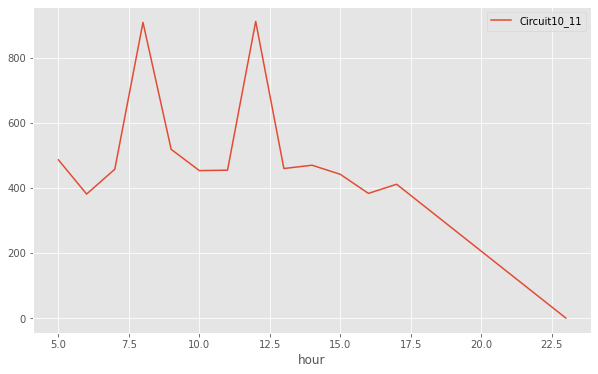

In [ ]:
#df_circuit_avg = df_circuit_avg.set_index('hour')
#cols_plot = [ 'Circuit_10' ,'Circuit_11', 'Circuit_12', 'Circuit_13','Circuit_14','Circuit_15', 'Circuit_16', 'Circuit_66']
cols_plot = [ 'Circuit10_11']
axes = df_circuit_avg [cols_plot].plot(linestyle='-', figsize=(10, 6), subplots=True)
#for ax in axes:
#ax.set_ylabel('Time_diff')
    
#plt.savefig("Circuit_12_std.png", format="png") 

In [ ]:
import math
def calculateDistance(x1,y1,x2,y2):
  
  dy = y2 - y1
  dx = x2 - x1
  dist = math.sqrt((dx)**2 + (dy)**2)
  
  return dist

def get_distance(d):
  v = d.copy()  
  v.drop(columns=['date'], inplace=True)  
  v[['s_long', 's_lat']] = v[['LocationX', 'LocationY']].shift(-1)
  v.dropna(inplace=True)  
  v['distance'] = v[['LocationX', 'LocationY', 's_long', 's_lat']].apply(lambda x: calculateDistance(x['s_long'], x['s_lat'], x['LocationX'], x['LocationY']), axis=1)
  return v

In [ ]:
def good_dataset(df):
  
  df_need12 = df12.loc[:,['Time','Alive'	,'LastTimeSeen'	,'ConnectionStage'	,'Enabled'
                     ,'DeviceState'	,'DeviceStateDescription'	,'Errors'	,'Circuit'	,'DestinationNode'	,'LocationX'	,'LocationY']]

  df_need12['Time'] = pd.to_datetime(df_need12['Time'],format='%Y%m%d %H:%M:%S')
  #extract date
  df_need12['date'] = df_need12['Time'].dt.strftime('%D')
  df_need12['date'] = pd.to_datetime(df_need12.date)
  df_need12.insert(0, 'date', df_need12.pop('date'))
  df_need12 = df_need12.sort_values(by='Time')
  df_need12 = df_need12.dropna()  
  df_need12 = df_need12.sort_values(['date', 'Time']).reset_index(drop=True)
  # apply the function to the groups
  test = df_need12.groupby('date').apply(get_distance)
  test = test.loc[:,[	'Time','Enabled'	,'Circuit'	,'DestinationNode'	,'LocationX'	,'LocationY','distance']]

  dpp = test.copy()
  dpp['Time'] = pd.to_datetime(dpp['Time'],format='%Y%m%d %H:%M:%S')
  dpp['Time'] = pd.to_datetime(dpp.Time).dt.tz_localize(None)
  dpp['Time'] = dpp['Time'].astype('datetime64[s]')
  #remove timezone
  dpp['Time'] = pd.to_datetime(dpp.Time).dt.tz_localize(None)

  dpp['T_Time']  = pd.to_datetime(dpp['Time']).dt.time

  dpp['T_Time']  = pd.to_datetime(dpp['Time']).dt.time
  dpp['hour'] = dpp['Time'].dt.hour
  #arranging
  zero_column1 = dpp.pop('hour')
  dpp.insert(1, 'hour' ,zero_column1)

  zero_column2 = dpp.pop('T_Time')
  dpp.insert(2, 'T_Time' ,zero_column2)
  return dpp

In [ ]:
def get_matrix(df):
  
  dff = df.loc[(df['distance'] == 0)]


  dff = dff.loc[:,['hour','Time','Circuit'	,'LocationX'	,'LocationY','distance']]
  dff = dff.sort_values(by='Time')

  df1 = dff[dff['Circuit'].isin([10, 11, 12, 13, 14, 15])]

  df1 = dff.loc[(dff['Circuit'].ne(dff['Circuit'].shift())) | 
             (dff['Circuit'].ne(dff['Circuit'].shift(-1)))]

  dd = df1.copy()
  ddt = pd.concat([dd.add_suffix('_pre').shift(), dd], axis=1)
  ddt['Time_diff'] = ddt["Time"].diff().apply(lambda x: x/np.timedelta64(1, 's')).fillna(0).astype('int64')

  ds = ddt.loc[:,['hour','Time_pre','Time','Circuit' ,'Time_diff']] 
  ds = ds.dropna()
  dfff = ds.loc[:,['hour','Time_pre','Time','Circuit' ,'Time_diff']]

  df_pivot_avg = pd.pivot_table(dfff, values='Time_diff', index='Circuit', columns=['hour'],aggfunc= np.mean)
  #Transfer row to columns
  df_pivot_avg1 = df_pivot_avg.T
  df_pivot_avg1  = df_pivot_avg1 .reset_index()
  df_pivot_avg1.columns = ['hour','Circuit_10' ,'Circuit_11', 'Circuit_12', 'Circuit_13','Circuit_14','Circuit_15']
  df_circuit_avg = df_pivot_avg1.fillna(0)

  df_circuit_avg['Circuit10_11'] = df_circuit_avg["Circuit_10"] + df_circuit_avg["Circuit_11"]
  df_circuit_avg['Circuit12_13'] = df_circuit_avg["Circuit_12"] + df_circuit_avg["Circuit_13"]
  df_circuit_avg['Circuit14_15'] = df_circuit_avg["Circuit_14"] + df_circuit_avg["Circuit_15"]
  df_circuit_avg = df_circuit_avg.drop(['Circuit_10', 'Circuit_11','Circuit_12', 'Circuit_13', 'Circuit_14', 'Circuit_15'], axis = 1)
  return df_circuit_avg

In [ ]:
df12= pd.read_csv('DeviceHistoryData_New_9_20june.csv', index_col= 0)
df12 = df12.sort_values(by='Time')
df = good_dataset(df12)
df

Time  hour    T_Time  Enabled  Circuit  \
date                                                                      
2022-06-09 0      2022-06-09 07:00:00     7  07:00:00     True     11.0   
           1      2022-06-09 07:00:01     7  07:00:01     True     11.0   
           2      2022-06-09 07:00:02     7  07:00:02     True     11.0   
           3      2022-06-09 07:00:03     7  07:00:03     True     11.0   
           4      2022-06-09 07:00:04     7  07:00:04     True     11.0   
...                               ...   ...       ...      ...      ...   
2022-06-20 332912 2022-06-20 14:26:18    14  14:26:18     True     15.0   
           332913 2022-06-20 14:26:19    14  14:26:19     True     15.0   
           332914 2022-06-20 14:26:20    14  14:26:20     True     15.0   
           332915 2022-06-20 14:26:21    14  14:26:21     True     15.0   
           332916 2022-06-20 14:26:22    14  14:26:22     True     15.0   

                   DestinationNode  LocationX  LocationY  distance  
date                                                                
2022-06-09 0                2076.0     23.270      4.719  0.518078  
           1                2076.0     23.788      4.710  0.309006  
           2                2078.0     24.097      4.708  0.021213  
           3                2078.0     24.076      4.711  0.173003  
           4                2078.0     23.903      4.712  0.288002  
...                            ...        ...        ...       ...  
2022-06-20 332912           2078.0     11.917     35.306  0.000000  
           332913           2078.0     11.917     35.306  0.000000  
           332914           2078.0     11.917     35.306  0.000000  
           332915           2078.0     11.917     35.306  0.000000  
           332916           2078.0     11.917     35.306  0.000000  

[332909 rows x 9 columns]

In [ ]:
dd = get_matrix(df)
dd

,hour,Circuit10_11,Circuit12_13,Circuit14_15
0,5,11368.550000,13941.958333,78663.666667
1,6,380.807692,13522.100000,410.150000
2,7,458.077778,373.483333,17504.054945
3,8,908.703008,447.142157,416.374459
4,9,533.467492,447.452381,474.333333
5,10,441.166667,522.812500,438.368421
6,11,453.525210,410.739766,373.690476
7,12,920.241071,668.173077,421.628676
8,13,453.435897,494.142857,442.141026
9,14,485.416667,396.822222,433.552448


In [ ]:
dfff = df_10June.loc[:,['date','hour','Time_pre','Time','Circuit' ,'Time_diff']]

df_pivot_avg = pd.pivot_table(dfff, values='Time_diff', index='Circuit', columns=['hour'],aggfunc= np.mean)
df_pivot_avg

#Transfer row to columns
df_pivot_avg1 = df_pivot_avg.T
df_pivot_avg1  = df_pivot_avg1 .reset_index()
df_pivot_avg1


df_pivot_avg1.columns = ['hour','Circuit_10' ,'Circuit_11', 'Circuit_12', 'Circuit_13','Circuit_14','Circuit_15']
df_circuit_avg = df_pivot_avg1.fillna(0)
df_circuit_avg

,hour,Circuit_10,Circuit_11,Circuit_12,Circuit_13,Circuit_14,Circuit_15
0,6,186.00,266.000000,172.000000,245.250000,169.500000,155.000000
1,7,155.50,254.500000,148.500000,238.500000,160.500000,201.666667
2,8,172.00,237.000000,156.500000,235.000000,157.000000,165.000000
3,9,184.25,158.333333,159.500000,238.000000,541.000000,307.666667
4,10,157.50,324.333333,105.000000,235.000000,109.000000,278.500000
5,11,188.00,235.000000,495.666667,234.250000,117.000000,235.500000
6,12,193.25,156.666667,118.000000,270.000000,196.333333,234.750000
7,13,142.50,339.333333,82.250000,263.500000,133.500000,186.666667
8,14,179.50,234.750000,110.666667,235.000000,152.000000,312.666667
9,15,84.00,332.500000,191.333333,235.000000,112.000000,215.333333


In [ ]:
df_circuit_avg['Circuit10_11'] = df_circuit_avg["Circuit_10"] + df_circuit_avg["Circuit_11"]
df_circuit_avg['Circuit12_13'] = df_circuit_avg["Circuit_12"] + df_circuit_avg["Circuit_13"]
df_circuit_avg['Circuit14_15'] = df_circuit_avg["Circuit_14"] + df_circuit_avg["Circuit_15"]
df_circuit_avg = df_circuit_avg.drop(['Circuit_10', 'Circuit_11','Circuit_12', 'Circuit_13', 'Circuit_14', 'Circuit_15'], axis = 1)
df_circuit_avg

,hour,Circuit10_11,Circuit12_13,Circuit14_15
0,6,452.000000,417.250000,324.500000
1,7,410.000000,387.000000,362.166667
2,8,409.000000,391.500000,322.000000
3,9,342.583333,397.500000,848.666667
4,10,481.833333,340.000000,387.500000
5,11,423.000000,729.916667,352.500000
6,12,349.916667,388.000000,431.083333
7,13,481.833333,345.750000,320.166667
8,14,414.250000,345.666667,464.666667
9,15,416.500000,426.333333,327.333333


In [ ]:
df_circuit_avg.to_csv('df_circuit_avg_10June.csv')

In [ ]:
dfff = df_9June.loc[:,['date','hour','Time_pre','Time','Circuit' ,'Time_diff']]

df_pivot_avg = pd.pivot_table(dfff, values='Time_diff', index='Circuit', columns=['hour'],aggfunc= np.mean)
df_pivot_avg

#Transfer row to columns
df_pivot_avg1 = df_pivot_avg.T
df_pivot_avg1  = df_pivot_avg1 .reset_index()
df_pivot_avg1


df_pivot_avg1.columns = ['hour','Circuit_10' ,'Circuit_11', 'Circuit_12', 'Circuit_13','Circuit_14','Circuit_15']
df_circuit_avg = df_pivot_avg1.fillna(0)
df_circuit_avg

,hour,Circuit_10,Circuit_11,Circuit_12,Circuit_13,Circuit_14,Circuit_15
0,7,178.000000,298.666667,205.750000,162.666667,152.000000,236.500000
1,8,126.333333,236.000000,167.000000,312.333333,147.250000,241.000000
2,9,187.000000,236.500000,763.500000,270.500000,161.500000,235.000000
3,10,318.000000,234.000000,972.500000,235.000000,156.500000,1.000000
4,11,163.250000,251.000000,108.666667,234.000000,153.500000,314.333333
5,12,783.500000,234.500000,158.000000,229.500000,164.500000,230.000000
6,13,175.500000,242.500000,339.333333,237.750000,109.333333,238.500000
7,14,175.250000,157.333333,153.000000,236.500000,170.666667,259.500000
8,15,173.500000,316.333333,110.500000,238.000000,119.500000,237.500000


In [ ]:
df_circuit_avg['Circuit10_11'] = df_circuit_avg["Circuit_10"] + df_circuit_avg["Circuit_11"]
df_circuit_avg['Circuit12_13'] = df_circuit_avg["Circuit_12"] + df_circuit_avg["Circuit_13"]
df_circuit_avg['Circuit14_15'] = df_circuit_avg["Circuit_14"] + df_circuit_avg["Circuit_15"]
df_circuit_avg = df_circuit_avg.drop(['Circuit_10', 'Circuit_11','Circuit_12', 'Circuit_13', 'Circuit_14', 'Circuit_15'], axis = 1)
df_circuit_avg

,hour,Circuit10_11,Circuit12_13,Circuit14_15
0,7,476.666667,368.416667,388.500000
1,8,362.333333,479.333333,388.250000
2,9,423.500000,1034.000000,396.500000
3,10,552.000000,1207.500000,157.500000
4,11,414.250000,342.666667,467.833333
5,12,1018.000000,387.500000,394.500000
6,13,418.000000,577.083333,347.833333
7,14,332.583333,389.500000,430.166667
8,15,489.833333,348.500000,357.000000


In [ ]:
dpp_stop1 = dpp.loc[(dpp['distance'] == 0)]

df_10June = dpp_stop.loc[:,['date','Time','ConnectionStage'	,'DeviceState'	,'DeviceStateDescription'	,'Errors'	,'Circuit'	,'DestinationNode'	,'LocationX'	,'LocationY','distance']]
df_10June = df_10June.sort_values(by='Time')

dpp = df_10June.copy()
dpp['Time'] = pd.to_datetime(dpp['Time'],format='%Y%m%d %H:%M:%S')
#remove timezone
dpp['Time'] = pd.to_datetime(dpp.Time).dt.tz_localize(None)

dpp['T_Time']  = pd.to_datetime(dpp['Time']).dt.time
#arranging
zero_column = dpp.pop('T_Time')
dpp.insert(1, 'T_Time' ,zero_column)

In [ ]:
#dpp_stop_10 = dpp_stop[(dpp_stop['Circuit'] == 10)]
#dpp_stop_10

In [ ]:
df1 = df.loc[(df['DeviceState'].ne(df['DeviceState'].shift())) | 
             (df['DeviceState'].ne(df['DeviceState'].shift(-1)))]
df1